In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
cola = pd.read_excel("C:/Users/H P/Desktop/ANACONDA/FORECASTING/ASSIGNMENT/Cocacola.xlsx")
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

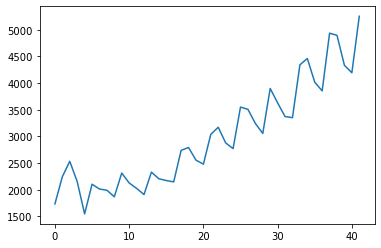

In [3]:
cola.Sales.plot()

In [21]:
cola['date'] = pd.to_datetime(cola["Quarter"].str.split('_').apply(lambda x: ''.join(x[::-1])))

In [23]:
cola["month"] = cola.date.dt.strftime("%b")
cola["year"] = cola.date.dt.strftime("%Y")

In [24]:
cola

,Quarter,Sales,date,month,year
0,Q1_86,1734.827000,2086-01-01,Jan,2086
1,Q2_86,2244.960999,2086-04-01,Apr,2086
2,Q3_86,2533.804993,2086-07-01,Jul,2086
3,Q4_86,2154.962997,2086-10-01,Oct,2086
4,Q1_87,1547.818996,2087-01-01,Jan,2087
5,Q2_87,2104.411995,2087-04-01,Apr,2087
6,Q3_87,2014.362999,2087-07-01,Jul,2087
7,Q4_87,1991.746998,2087-10-01,Oct,2087
8,Q1_88,1869.049999,2088-01-01,Jan,2088
9,Q2_88,2313.631996,2088-04-01,Apr,2088


<AxesSubplot:xlabel='month', ylabel='year'>

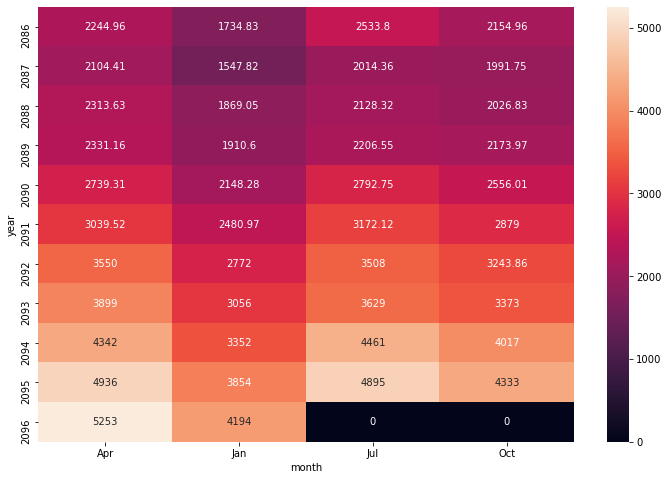

In [25]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

In [32]:
Train = cola.head(31)
Test = cola.tail(10)

In [33]:
Train

,Quarter,Sales,date,month,year
0,Q1_86,1734.827000,2086-01-01,Jan,2086
1,Q2_86,2244.960999,2086-04-01,Apr,2086
2,Q3_86,2533.804993,2086-07-01,Jul,2086
3,Q4_86,2154.962997,2086-10-01,Oct,2086
4,Q1_87,1547.818996,2087-01-01,Jan,2087
5,Q2_87,2104.411995,2087-04-01,Apr,2087
6,Q3_87,2014.362999,2087-07-01,Jul,2087
7,Q4_87,1991.746998,2087-10-01,Oct,2087
8,Q1_88,1869.049999,2088-01-01,Jan,2088
9,Q2_88,2313.631996,2088-04-01,Apr,2088


In [34]:
Test

,Quarter,Sales,date,month,year
32,Q1_94,3352.0,2094-01-01,Jan,2094
33,Q2_94,4342.0,2094-04-01,Apr,2094
34,Q3_94,4461.0,2094-07-01,Jul,2094
35,Q4_94,4017.0,2094-10-01,Oct,2094
36,Q1_95,3854.0,2095-01-01,Jan,2095
37,Q2_95,4936.0,2095-04-01,Apr,2095
38,Q3_95,4895.0,2095-07-01,Jul,2095
39,Q4_95,4333.0,2095-10-01,Oct,2095
40,Q1_96,4194.0,2096-01-01,Jan,2096
41,Q2_96,5253.0,2096-04-01,Apr,2096


In [35]:
import statsmodels.formula.api as smf 
#linear model
linear_model = smf.ols('Sales~month',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['month'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

1871.743538675839

In [36]:
#DATA DRIVEN MODEL
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

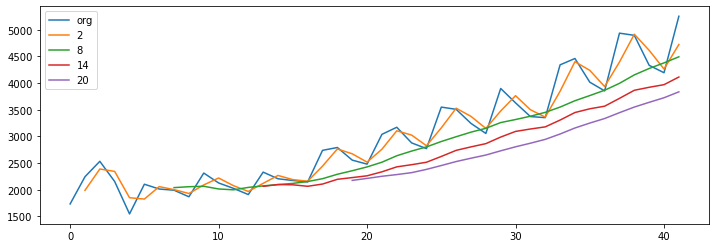

In [37]:
plt.figure(figsize=(12,4))
cola.Sales.plot(label="org")
for i in range(2,24,6):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

<ipython-input-38-946ae3635d66>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(cola.Sales,freq=12)


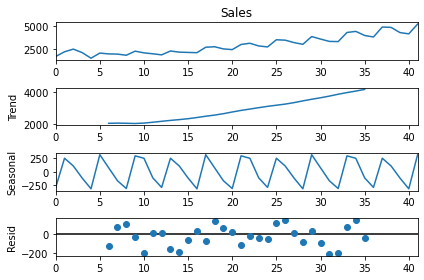

In [38]:
decompose_ts_add = seasonal_decompose(cola.Sales,freq=12)
decompose_ts_add.plot()
plt.show() 

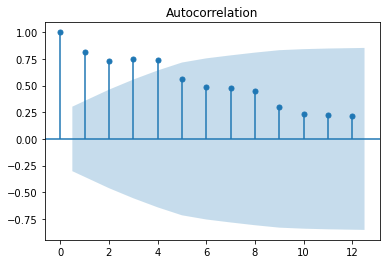

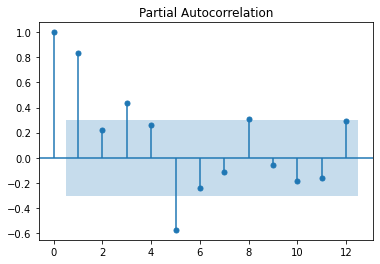

In [40]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show() 

In [41]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

In [42]:
Train["Sales"] = Train["Sales"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

<ipython-input-42-dc204503d3b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train["Sales"] = Train["Sales"].astype('double')
C:\Users\H P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


23.033303310163465

In [43]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)   

C:\Users\H P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-43-4f52416275f9>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


9.309660103018595

In [44]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

C:\Users\H P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


7.602737250133714

In [45]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 

C:\Users\H P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


7.287266749484351

In [47]:
cola["Sales"] = cola["Sales"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(cola["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()  

C:\Users\H P\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [48]:
hwe_model_mul_add.forecast(10) 
#using holt method to calculate forecast

42    4935.883481
43    4623.671538
44    4560.135920
45    5780.500007
46    5829.076312
47    5250.352501
48    4992.198233
49    6269.689494
50    6168.518500
51    5623.056816
dtype: float64